In [1]:
# import modules & set up logging
import logging
import os

import numpy as np

import gensim
from gensim.models import word2vec

import jieba.analyse
import jieba

In [4]:
# set up logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [5]:
sentence_file_path = './datas/in_the_name_of_people.txt'
word_file_path = './datas/cut_words_of_in_the_name_of_people.txt'
model_file_path1 = './datas/gensim_word2vec1.w2v'
model_file_path2 = './datas/gensim_word2vec2.bin'
model_file_path3 = './datas/gensim_word2vec3_{}.npy'

## 一、分词

In [10]:
# 人民的名义 小说分词
jieba.suggest_freq('沙瑞金',True)
jieba.suggest_freq('田国富',True)
jieba.suggest_freq('高育良',True)
jieba.suggest_freq('侯亮平',True)
jieba.suggest_freq('钟小艾', True)
jieba.suggest_freq('陈岩石', True)
jieba.suggest_freq('欧阳菁', True)
jieba.suggest_freq('易学习', True)
jieba.suggest_freq('王大路', True)
jieba.suggest_freq('蔡成功', True)
jieba.suggest_freq('孙连城', True)
jieba.suggest_freq('季昌明', True)
jieba.suggest_freq('丁义珍', True)
jieba.suggest_freq('郑西坡', True)
jieba.suggest_freq('赵东来', True)
jieba.suggest_freq('高小琴', True)
jieba.suggest_freq('赵瑞龙', True)
jieba.suggest_freq('林华华', True)
jieba.suggest_freq('陆亦可', True)
jieba.suggest_freq('刘新建', True)
jieba.suggest_freq('刘庆祝', True)
jieba.suggest_freq('京州市', True)
jieba.suggest_freq('副市长', True)
jieba.suggest_freq('赵德汉',True)
jieba.suggest_freq('H大学',True)
jieba.suggest_freq('H省',True)
jieba.suggest_freq('政法系', True)
jieba.suggest_freq(('哥', '求'), True)

word_cnt = {}
total_word_cnt = 0

with open(word_file_path,'w', encoding='utf-8') as writer:
    with open(sentence_file_path, 'r', encoding='utf-8') as reader:
        # 加载所有数据
        content = reader.read()
        
        # 分词
        content = jieba.lcut(content)

        # 统计各个单词出现的次数
        for word in content:
            word_cnt[word] = word_cnt.get(word, 0) + 1
            total_word_cnt += 1
        
        # 合并结果
        result = ' '.join(content)
        
        # 结果输出
        writer.write(result)
print("Done!!!")

Done!!!


In [24]:
## 计算单词的词频(获取最多的十个)

word_freq = []
for word in word_cnt.keys():
    word_freq.append([word, word_cnt[word] / total_word_cnt])
sorted_word_freq = sorted(word_freq, key=lambda t: t[1], reverse=True)
sorted_word_freq[:100]

[['，', 0.09016437265722925],
 ['的', 0.033516101629469455],
 [' ', 0.028157802503311808],
 ['。', 0.028033052745385745],
 ['了', 0.02777761276487047],
 ['！', 0.014708590505949375],
 ['：', 0.014435329131444661],
 ['\n', 0.014375924484813202],
 ['？', 0.012564082762553688],
 ['是', 0.011744298639039545],
 ['他', 0.011108668920082929],
 ['我', 0.010324527584547664],
 ['你', 0.009284946268497123],
 ['说', 0.008209722164467704],
 ['侯亮平', 0.008049329618562764],
 ['在', 0.008031508224573327],
 ['也', 0.0065107492708079626],
 ['就', 0.006326594866250438],
 ['…', 0.006047393027082578],
 ['和', 0.005595917712683486],
 ['啊', 0.005566215389367756],
 ['不', 0.0049781093877163075],
 ['李达康', 0.004378122456738566],
 ['这', 0.004294955951454522],
 ['有', 0.004104861082233852],
 ['着', 0.003920706677676328],
 ['都', 0.003801897384413409],
 ['高育良', 0.0037246713437925115],
 ['把', 0.0032197318474251058],
 ['蔡成功', 0.0031187439481516243],
 ['让', 0.003023696513541289],
 ['祁同伟', 0.0029880537255624136],
 ['老师', 0.002958351402246

## 二、Gensim Word2Vec构建

#### 训练方式一

In [27]:
print(f"针对低频词 -> 删除概率:{max(1 - np.sqrt(0.0001 / 0.0000001), 0)}")
print(f"针对低频词 -> 删除概率:{max(1 - np.sqrt(0.0001 / 0.0001), 0)}")
print(f"针对高频词 -> 删除概率:{max(1 - np.sqrt(0.0001 / 0.00011), 0)}")
print(f"针对高频词 -> 删除概率:{max(1 - np.sqrt(0.0001 / 0.0002), 0)}")
print(f"针对高频词 -> 删除概率:{max(1 - np.sqrt(0.0001 / 0.0011), 0)}")
print(f"针对高频词 -> 删除概率:{max(1 - np.sqrt(0.0001 / 0.02), 0)}")

针对低频词 -> 删除概率:0
针对低频词 -> 删除概率:0.0
针对高频词 -> 删除概率:0.04653741075440765
针对高频词 -> 删除概率:0.2928932188134524
针对高频词 -> 删除概率:0.6984886554222364
针对高频词 -> 删除概率:0.9292893218813453


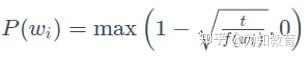

In [28]:
# 每行数据加载
print(f"文件路径:{word_file_path}")
sentences = word2vec.LineSentence(word_file_path) 

# 训练Word2Vec模型
"""
class gensim.models.word2vec.Word2Vec(
    sentences=None, corpus_file=None, 
    vector_size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, 
    sample=0.001, seed=1, workers=3, min_alpha=0.0001, 
    sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, 
    hashfxn=<built-in function hash>, epochs=5, 
    null_word=0, trim_rule=None, sorted_vocab=1, 
    batch_words=10000, compute_loss=False, 
    callbacks=(), comment=None, max_final_vocab=None, shrink_windows=True)

sentences=None,  给定训练数据对应的文本对象
corpus_file=None, 词汇表对应的文件，如果不给定的话，直接采用训练数据构建词典/词汇表
vector_size=100, 期望单词映射的维度大小
alpha=0.025, 学习率
window=5, 窗口大小，窗口大小 = 周边词 + 1
min_count=5, 针对词频小于5的单词直接删除    
sample: 0.001 二次重采样时候的系数t --> 在训练前对所有的token进行遍历处理 --> 随机丢弃 --> 单词词频高的被丢弃的可能性就高，词频低的丢弃的可能性就低 ---> 缓解低频词学习/更新少的情况
sg=0, 0表示CBOW、1表示Skip-Gram
hs=0, 0表示负采样 1表示哈夫曼树(层次Softmax)
negative=5, 仅在hs=0的时候生效，负采样的类别数量；当设定为0的时候，表示不进行负采样
ns_exponent=0.75, 负采样过程中，计算词频过程中的系数
cbow_mean=1, 0表示cbow中求和，1表示cbow中求均值

"""
model = word2vec.Word2Vec(sentences,sg=1, hs = 1,min_count = 1,window = 11,vector_size = 100)

2025-07-19 10:56:02,017 : INFO : collecting all words and their counts
2025-07-19 10:56:02,019 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-07-19 10:56:02,060 : INFO : collected 17863 word types from a corpus of 161146 raw words and 2311 sentences
2025-07-19 10:56:02,061 : INFO : Creating a fresh vocabulary
2025-07-19 10:56:02,093 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 17863 unique words (100.00% of original 17863, drops 0)', 'datetime': '2025-07-19T10:56:02.093952', 'gensim': '4.3.3', 'python': '3.12.9 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 18:49:16) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.22631-SP0', 'event': 'prepare_vocab'}
2025-07-19 10:56:02,096 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 161146 word corpus (100.00% of original 161146, drops 0)', 'datetime': '2025-07-19T10:56:02.096001', 'gensim': '4.3.3', 'python': '3.12.9 | packaged by Anaconda, Inc. |

文件路径:./datas/cut_words_of_in_the_name_of_people.txt


2025-07-19 10:56:02,564 : INFO : built huffman tree with maximum node depth 17
2025-07-19 10:56:02,659 : INFO : estimated required memory for 17863 words and 100 dimensions: 33939700 bytes
2025-07-19 10:56:02,660 : INFO : resetting layer weights
2025-07-19 10:56:02,667 : INFO : Word2Vec lifecycle event {'update': False, 'trim_rule': 'None', 'datetime': '2025-07-19T10:56:02.667984', 'gensim': '4.3.3', 'python': '3.12.9 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 18:49:16) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.22631-SP0', 'event': 'build_vocab'}
2025-07-19 10:56:02,669 : WARNING : Both hierarchical softmax and negative sampling are activated. This is probably a mistake. You should set either 'hs=0' or 'negative=0' to disable one of them. 
2025-07-19 10:56:02,670 : INFO : Word2Vec lifecycle event {'msg': 'training model with 3 workers on 17863 vocabulary and 100 features, using sg=1 hs=1 sample=0.001 negative=5 window=11 shrink_windows=True', 'datetime': '2025-

#### 训练方式二

In [31]:
# 每行数据加载
sentences = word2vec.LineSentence(word_file_path) 

# 创建Word2Vec模型
model = word2vec.Word2Vec(hs = 1,min_count = 5,window = 5,vector_size = 100)

# 构建词典
model.build_vocab(sentences)

# 模型训练
model.train(sentences, total_examples=model.corpus_count, epochs=5)

2025-07-19 10:57:47,412 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec<vocab=0, vector_size=100, alpha=0.025>', 'datetime': '2025-07-19T10:57:47.411535', 'gensim': '4.3.3', 'python': '3.12.9 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 18:49:16) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.22631-SP0', 'event': 'created'}
2025-07-19 10:57:47,423 : INFO : collecting all words and their counts
2025-07-19 10:57:47,425 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-07-19 10:57:47,468 : INFO : collected 17863 word types from a corpus of 161146 raw words and 2311 sentences
2025-07-19 10:57:47,470 : INFO : Creating a fresh vocabulary
2025-07-19 10:57:47,480 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 3340 unique words (18.70% of original 17863, drops 14523)', 'datetime': '2025-07-19T10:57:47.480107', 'gensim': '4.3.3', 'python': '3.12.9 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 18:49:16) [MSC v.1

(478045, 805730)

## 三、Word2Vec应用
- PS: Word2Vec的模型训练完成后，所有的使用操作都是基于单词向量的使用

### 0. 获取Word2Vec模型相关属性

In [32]:
print("【词汇数目】: {}".format(len(model.wv.key_to_index)))
print("【转换的稠密的特征向量维度数目,每个单词转换的向量维度大小】: {}".format(model.wv.vector_size))
print("【单词到id的映射关系】: \n{}".format(model.wv.key_to_index))

【词汇数目】: 3340
【转换的稠密的特征向量维度数目,每个单词转换的向量维度大小】: 100
【单词到id的映射关系】: 
{'，': 0, '的': 1, '。': 2, '了': 3, '！': 4, '：': 5, '？': 6, '是': 7, '他': 8, '我': 9, '你': 10, '说': 11, '侯亮平': 12, '在': 13, '也': 14, '就': 15, '…': 16, '和': 17, '啊': 18, '不': 19, '李达康': 20, '这': 21, '有': 22, '着': 23, '都': 24, '高育良': 25, '把': 26, '蔡成功': 27, '让': 28, '祁同伟': 29, '老师': 30, '要': 31, '还': 32, '上': 33, '—': 34, '又': 35, '一个': 36, '吧': 37, '到': 38, '书记': 39, '呢': 40, '吗': 41, '没': 42, '人': 43, '对': 44, '地': 45, '沙瑞金': 46, '得': 47, '、': 48, '给': 49, '她': 50, '高小琴': 51, '就是': 52, '我们': 53, '不是': 54, '知道': 55, '这个': 56, '去': 57, '很': 58, '来': 59, '丁义珍': 60, '自己': 61, '现在': 62, '好': 63, '陆亦可': 64, '陈海': 65, '同志': 66, '欧阳菁': 67, '想': 68, '那': 69, '他们': 70, '啥': 71, '季昌明': 72, '这么': 73, '被': 74, '道': 75, '怎么': 76, '您': 77, '高': 78, '局长': 79, '嘛': 80, '会': 81, '你们': 82, '能': 83, '但': 84, '做': 85, '起来': 86, '没有': 87, '一': 88, '走': 89, '谁': 90, '什么': 91, '向': 92, '还是': 93, '却': 94, '大风': 95, '过': 96, '看': 97, '可': 98, '里': 99, '

### 1. 获取相似度最高的K个演员

In [33]:
# 夹角余弦相似度
req_count = 10
for (word, sim) in model.wv.similar_by_word('沙瑞金', topn =100):
    if len(word)==3:  # 为了过滤一下
        req_count -= 1
        print(word, sim)
        if req_count == 0:
            break;

高育良 0.9216133952140808
季昌明 0.8519390225410461
田国富 0.8326984643936157
李达康 0.8210592269897461
侯亮平 0.8080556392669678
易学习 0.7911063432693481
祁同伟 0.7741288542747498
吴慧芬 0.7605096697807312
谢谢您 0.7545325756072998
孙书记 0.7496090531349182


In [34]:
# 夹角余弦相似度
req_count = 10
for (word, sim) in model.wv.similar_by_word('沙瑞金', topn =100):
    if len(word)==4:  # 为了过滤一下
        req_count -= 1
        print(word, sim)
        if req_count == 0:
            break;

不好意思 0.7883992195129395
话里有话 0.7702974081039429
痛心疾首 0.7396705746650696
心里有数 0.7330861687660217


In [38]:
import jieba.posseg as pseg

jieba.add_word('沙瑞金',10,'nr')
jieba.add_word('田国富',10,'nr')
jieba.add_word('高育良',10,'nr')
jieba.add_word('侯亮平',10,'nr')
jieba.add_word('钟小艾', 10,'nr')
jieba.add_word('陈岩石', 10,'nr')
jieba.add_word('欧阳菁', 10,'nr')
jieba.add_word('易学习', 10,'nr')
jieba.add_word('王大路', 10,'nr')
jieba.add_word('蔡成功', 10,'nr')
jieba.add_word('孙连城', 10,'nr')
jieba.add_word('季昌明', 10,'nr')
jieba.add_word('丁义珍', 10,'nr')
jieba.add_word('郑西坡', 10,'nr')
jieba.add_word('赵东来', 10,'nr')
jieba.add_word('高小琴', 10,'nr')
jieba.add_word('赵瑞龙', 10,'nr')
jieba.add_word('林华华', 10,'nr')
jieba.add_word('陆亦可', 10,'nr')
jieba.add_word('刘新建', 10,'nr')
jieba.add_word('刘庆祝', 10,'nr')
jieba.add_word('京州市', 10,'nr')
jieba.add_word('副市长', 10,'nr')
jieba.add_word('赵德汉',10,'nr')
jieba.add_word("谢谢您", None, "o")


tmp01 = model.wv.similar_by_word('沙瑞金', topn=100)
tmp01 = dict(tmp01)
for k in tmp01.keys():
    jieba.suggest_freq(k, True)
tmp02 = ' '.join(list(tmp01.keys()))
words = pseg.lcut(tmp02)
for word,flag in words:
    if flag == 'nr':
        print(word, tmp01[word])


高育良 0.9216133952140808
季昌明 0.8519390225410461
田国富 0.8326984643936157
侯亮平 0.8080556392669678
易学习 0.7911063432693481
孙书记 0.7496090531349182
梁 0.7196950316429138


In [36]:
tmp02

'高育良 注意 季昌明 感慨 冷冷 沉默 田国富 片刻 李达康 听罢 头 惊讶 慢慢 侯亮平 严肃 摆手 问得 前任 心疼 不悦 否认 坚定 叹息 亮 易学习 这位 不好意思 很 插话 新来 无奈 疑惑 祁同伟 话里有话 看清 罢 怔住 问道 指点 吴慧芬 一眼 面色 补充 摊开 客气 开口 谢谢您 冻结 强调 老 示意 省委 强势 口气 孙书记 风趣 伸出 难得 握住 急于 的话 求援 一脸 起飞 扶手 指示 痛心疾首 女婿 百姓 呷 凝视 貌似 当即 任 沉思 肩头 摇头 向 心里有数 笑眯眯 干脆 表态 赵立春 失望 激动 指出 感叹 别说 反驳 提出 眼神 汇报 喝酒 随意 面孔 讲话 梁 细节 谨慎 开玩笑'

### 2. 获取单词之间的相似度

In [39]:
# 夹角余弦相似度
print(model.wv.similarity('沙瑞金', '高育良'))

0.9216134


In [42]:
# 夹角余弦相似度
v1 = model.wv.get_vector("沙瑞金")
v2 = model.wv.get_vector("高育良")
np.sum(v1 * v2) / (np.sqrt(np.sum(np.power(v1, 2))) * np.sqrt(np.sum(np.power(v2, 2))))

0.92161345

### 3. 获取单词的词向量

In [43]:
v1 = model.wv.get_vector("提拔")
print(v1.shape)
print(v1)

(100,)
[-0.17495386  0.27622783  0.02288895 -0.11290801 -0.11376937 -0.30391502
  0.07693902  0.51721346 -0.01823785 -0.03920164 -0.15381655 -0.19613051
 -0.15490912 -0.04688768  0.20910653 -0.10933792  0.02849753 -0.09434347
 -0.13072962 -0.16785981  0.04314258  0.00456681  0.31073973  0.10735862
 -0.02972864  0.16319892 -0.08341633  0.02604993 -0.36052746  0.24517098
  0.09363818 -0.04013398  0.20469844 -0.14387059 -0.01917479  0.23229507
 -0.03317365 -0.07366914 -0.33529025 -0.04323674 -0.21077302 -0.12493966
 -0.19144772  0.07780991  0.09803715  0.03083379  0.18724903  0.08965228
 -0.00741856  0.04698123  0.22243173 -0.05232906 -0.10738719 -0.05884659
 -0.04602578 -0.04986475  0.31332183 -0.08784745 -0.14432488  0.1366827
  0.02816262 -0.00529488 -0.04935583  0.12504636 -0.06491704  0.07282184
  0.05774572  0.14135614 -0.39007607  0.11732053  0.14967056 -0.05251732
  0.22536774  0.02572123  0.01651329  0.23720804  0.00241882 -0.10682805
 -0.15821595  0.05521663  0.02361767  0.10242

In [44]:
model.wv['提拔']

array([-0.17495386,  0.27622783,  0.02288895, -0.11290801, -0.11376937,
       -0.30391502,  0.07693902,  0.51721346, -0.01823785, -0.03920164,
       -0.15381655, -0.19613051, -0.15490912, -0.04688768,  0.20910653,
       -0.10933792,  0.02849753, -0.09434347, -0.13072962, -0.16785981,
        0.04314258,  0.00456681,  0.31073973,  0.10735862, -0.02972864,
        0.16319892, -0.08341633,  0.02604993, -0.36052746,  0.24517098,
        0.09363818, -0.04013398,  0.20469844, -0.14387059, -0.01917479,
        0.23229507, -0.03317365, -0.07366914, -0.33529025, -0.04323674,
       -0.21077302, -0.12493966, -0.19144772,  0.07780991,  0.09803715,
        0.03083379,  0.18724903,  0.08965228, -0.00741856,  0.04698123,
        0.22243173, -0.05232906, -0.10738719, -0.05884659, -0.04602578,
       -0.04986475,  0.31332183, -0.08784745, -0.14432488,  0.1366827 ,
        0.02816262, -0.00529488, -0.04935583,  0.12504636, -0.06491704,
        0.07282184,  0.05774572,  0.14135614, -0.39007607,  0.11

In [45]:
# 异常：不存在"小明"这个单词
model.wv.get_vector("小明")

KeyError: "Key '小明' not present"

In [47]:
# 首先判断是否存在单词，如果存在，就返回，否则单词直接过滤
word = "小明"
#word = "李达康"
if word in model.wv:
    print("【向量】:\n{}".format(model.wv[word]))
else:
    print("【单词不存在】!!!")

【向量】:
[-2.48351589e-01  3.81763011e-01  2.27717645e-02  1.79141313e-02
 -1.74005032e-02 -4.79265213e-01  1.64628237e-01  4.49884623e-01
  1.66595742e-01 -3.07104401e-02 -8.44662543e-03 -2.18689859e-01
  1.86976179e-01  2.52330545e-02  2.28878856e-01 -1.05295792e-01
 -9.34947093e-05 -1.51668951e-01 -3.73324931e-01 -4.13655549e-01
 -2.04792216e-01 -2.12118655e-01  6.05936944e-01  3.19127381e-01
  4.40409407e-02  3.40878546e-01 -1.89993098e-01  2.40645215e-01
 -5.17147779e-01  1.72117233e-01  2.13852301e-01  1.69824306e-02
  6.47327185e-01 -4.52951790e-04  2.70375945e-02  4.40391123e-01
 -2.59511262e-01 -2.00314131e-02 -5.25167882e-01 -1.97949648e-01
 -6.78735256e-01 -3.92024517e-02 -5.94792128e-01  1.10133223e-01
  6.63524494e-02  1.35899797e-01  6.43189326e-02  9.08628181e-02
  6.80812460e-04  2.72495478e-01  3.87759447e-01 -2.78150588e-01
 -2.64958352e-01 -1.25205547e-01  8.98742769e-03 -3.53650004e-01
  7.32088327e-01 -2.44009763e-01 -2.79593140e-01  9.68021750e-02
 -2.14775383e-01 -1

## 四、模型持久化&模型恢复加载

### 方式一：
直接使用save API进行模型持久化

#### 持久化

In [48]:
model.save(model_file_path1)

2025-07-19 11:18:55,047 : INFO : Word2Vec lifecycle event {'fname_or_handle': './datas/gensim_word2vec1.w2v', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2025-07-19T11:18:55.047192', 'gensim': '4.3.3', 'python': '3.12.9 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 18:49:16) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.22631-SP0', 'event': 'saving'}
2025-07-19 11:18:55,048 : INFO : not storing attribute cum_table
2025-07-19 11:18:55,083 : INFO : saved ./datas/gensim_word2vec1.w2v


#### 加载

In [49]:
# 直接基于路径加载
model1 = word2vec.Word2Vec.load(model_file_path1)
print(model1)

v1 = model1.wv.get_vector("提拔")
print(v1.shape)
print(v1)

2025-07-19 11:19:07,321 : INFO : loading Word2Vec object from ./datas/gensim_word2vec1.w2v
2025-07-19 11:19:07,340 : INFO : loading wv recursively from ./datas/gensim_word2vec1.w2v.wv.* with mmap=None
2025-07-19 11:19:07,340 : INFO : setting ignored attribute cum_table to None
2025-07-19 11:19:07,358 : INFO : Word2Vec lifecycle event {'fname': './datas/gensim_word2vec1.w2v', 'datetime': '2025-07-19T11:19:07.358087', 'gensim': '4.3.3', 'python': '3.12.9 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 18:49:16) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.22631-SP0', 'event': 'loaded'}


Word2Vec<vocab=3340, vector_size=100, alpha=0.025>
(100,)
[-0.17495386  0.27622783  0.02288895 -0.11290801 -0.11376937 -0.30391502
  0.07693902  0.51721346 -0.01823785 -0.03920164 -0.15381655 -0.19613051
 -0.15490912 -0.04688768  0.20910653 -0.10933792  0.02849753 -0.09434347
 -0.13072962 -0.16785981  0.04314258  0.00456681  0.31073973  0.10735862
 -0.02972864  0.16319892 -0.08341633  0.02604993 -0.36052746  0.24517098
  0.09363818 -0.04013398  0.20469844 -0.14387059 -0.01917479  0.23229507
 -0.03317365 -0.07366914 -0.33529025 -0.04323674 -0.21077302 -0.12493966
 -0.19144772  0.07780991  0.09803715  0.03083379  0.18724903  0.08965228
 -0.00741856  0.04698123  0.22243173 -0.05232906 -0.10738719 -0.05884659
 -0.04602578 -0.04986475  0.31332183 -0.08784745 -0.14432488  0.1366827
  0.02816262 -0.00529488 -0.04935583  0.12504636 -0.06491704  0.07282184
  0.05774572  0.14135614 -0.39007607  0.11732053  0.14967056 -0.05251732
  0.22536774  0.02572123  0.01651329  0.23720804  0.00241882 -0.106

### 方式二：
保存为二进制词向量

#### 持久化

In [55]:
model.wv.save_word2vec_format(model_file_path2, binary=True)

2025-07-19 11:22:22,148 : INFO : storing 3340x100 projection weights into ./datas/gensim_word2vec2.bin


#### 加载

In [56]:
# 加载模型
model2 = gensim.models.KeyedVectors.load_word2vec_format(model_file_path2, binary=True)
print(model2)

# 应用模型
v1 = model2.get_vector("提拔")
print(v1.shape)
print(v1)

2025-07-19 11:23:07,337 : INFO : loading projection weights from ./datas/gensim_word2vec2.bin
2025-07-19 11:23:07,542 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (3340, 100) matrix of type float32 from ./datas/gensim_word2vec2.bin', 'binary': False, 'encoding': 'utf8', 'datetime': '2025-07-19T11:23:07.542003', 'gensim': '4.3.3', 'python': '3.12.9 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 18:49:16) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.22631-SP0', 'event': 'load_word2vec_format'}


KeyedVectors<vector_size=100, 3340 keys>
(100,)
[-0.17495386  0.27622783  0.02288895 -0.11290801 -0.11376937 -0.30391502
  0.07693902  0.51721346 -0.01823785 -0.03920164 -0.15381655 -0.19613051
 -0.15490912 -0.04688768  0.20910653 -0.10933792  0.02849753 -0.09434347
 -0.13072962 -0.16785981  0.04314258  0.00456681  0.31073973  0.10735862
 -0.02972864  0.16319892 -0.08341633  0.02604993 -0.36052746  0.24517098
  0.09363818 -0.04013398  0.20469844 -0.14387059 -0.01917479  0.23229507
 -0.03317365 -0.07366914 -0.33529025 -0.04323674 -0.21077302 -0.12493966
 -0.19144772  0.07780991  0.09803715  0.03083379  0.18724903  0.08965228
 -0.00741856  0.04698123  0.22243173 -0.05232906 -0.10738719 -0.05884659
 -0.04602578 -0.04986475  0.31332183 -0.08784745 -0.14432488  0.1366827
  0.02816262 -0.00529488 -0.04935583  0.12504636 -0.06491704  0.07282184
  0.05774572  0.14135614 -0.39007607  0.11732053  0.14967056 -0.05251732
  0.22536774  0.02572123  0.01651329  0.23720804  0.00241882 -0.10682805
 -0.

In [52]:
# 加载模型
model2 = gensim.models.KeyedVectors.load_word2vec_format('./datas/vectors.bin',
                                                         binary=True)
print(model2)

# 应用模型
v1 = model2.get_vector("酒店")
print(v1.shape)
print(v1)

2025-07-19 11:20:15,892 : INFO : loading projection weights from ./datas/vectors.bin
2025-07-19 11:20:15,936 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (7942, 128) matrix of type float32 from ./datas/vectors.bin', 'binary': True, 'encoding': 'utf8', 'datetime': '2025-07-19T11:20:15.936316', 'gensim': '4.3.3', 'python': '3.12.9 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 18:49:16) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.22631-SP0', 'event': 'load_word2vec_format'}


KeyedVectors<vector_size=128, 7942 keys>
(128,)
[ 0.07507085 -0.06233635 -0.08300601 -0.09476656  0.19525695  0.08683676
  0.267884    0.03470918  0.14521684  0.00294149 -0.02735998 -0.09170757
  0.00139181  0.2421832  -0.09511401  0.0341509   0.0283838   0.32073992
  0.172025    0.20465788  0.05929533  0.07462119 -0.23834492  0.0421031
 -0.0448295  -0.02866336  0.05001667 -0.1257836   0.22431172 -0.0807058
 -0.12493779 -0.05265829  0.13126895  0.15061386 -0.19615541 -0.09053446
 -0.05627611 -0.23135136 -0.01231913 -0.23680945 -0.04299964  0.3667591
 -0.06821534 -0.29599202  0.34265348 -0.04311483 -0.21866152 -0.2495054
 -0.43372962  0.0463162   0.11516414  0.07433167  0.09803177 -0.06165684
 -0.1319202   0.04795204  0.2651979   0.09628078 -0.16381025  0.12577897
  0.11097272 -0.15810862 -0.07860032  0.08296187  0.12618895  0.28030068
 -0.00506122  0.05640052  0.11889897 -0.11027029 -0.14830197 -0.00842615
  0.01188814  0.19347009  0.00282715 -0.3220406   0.22365303 -0.23093392
 -0.418

### 方式三：
直接使用NumPy API保存词向量信息

#### 持久化

In [53]:
# 获取词向量
norm_word_embeddings = model.wv.get_normed_vectors()  # L2-norm归一化转换后的单词向量
word_embeddings = model.wv.vectors  # 归一化转换前的单词向量
# 获取词典(词典到idx的映射)
vocab_2_index = list(map(lambda k: (k, model.wv.key_to_index[k]), model.wv.key_to_index))
print(np.shape(norm_word_embeddings), np.shape(word_embeddings), np.shape(vocab_2_index))
# 数据保存
np.save(model_file_path3.format("norm_embedding"), norm_word_embeddings)
np.save(model_file_path3.format("embedding"), word_embeddings)
np.save(model_file_path3.format("vocab_2_index"), vocab_2_index)

(3340, 100) (3340, 100) (3340, 2)


#### 加载

In [54]:
# 加载数据
norm_word_embeddings = np.load(model_file_path3.format("norm_embedding"))
word_embeddings = np.load(model_file_path3.format("embedding"))
vocab_2_index = np.load(model_file_path3.format("vocab_2_index"))

# 字典转换
vocab_2_index = dict(map(lambda t:(t[0], int(t[1])), vocab_2_index))

# 获取数据
word = "提拔"
index = vocab_2_index[word]
v1 = word_embeddings[index]
print(v1.shape)
print(v1)

(100,)
[-0.17495386  0.27622783  0.02288895 -0.11290801 -0.11376937 -0.30391502
  0.07693902  0.51721346 -0.01823785 -0.03920164 -0.15381655 -0.19613051
 -0.15490912 -0.04688768  0.20910653 -0.10933792  0.02849753 -0.09434347
 -0.13072962 -0.16785981  0.04314258  0.00456681  0.31073973  0.10735862
 -0.02972864  0.16319892 -0.08341633  0.02604993 -0.36052746  0.24517098
  0.09363818 -0.04013398  0.20469844 -0.14387059 -0.01917479  0.23229507
 -0.03317365 -0.07366914 -0.33529025 -0.04323674 -0.21077302 -0.12493966
 -0.19144772  0.07780991  0.09803715  0.03083379  0.18724903  0.08965228
 -0.00741856  0.04698123  0.22243173 -0.05232906 -0.10738719 -0.05884659
 -0.04602578 -0.04986475  0.31332183 -0.08784745 -0.14432488  0.1366827
  0.02816262 -0.00529488 -0.04935583  0.12504636 -0.06491704  0.07282184
  0.05774572  0.14135614 -0.39007607  0.11732053  0.14967056 -0.05251732
  0.22536774  0.02572123  0.01651329  0.23720804  0.00241882 -0.10682805
 -0.15821595  0.05521663  0.02361767  0.10242

# 五、扩展：直接从文件中读取数据来进行模型训练

In [57]:
from gensim import utils
from gensim.models.word2vec import Word2Vec


class MyData(object):
    def __iter__(self):
        path = word_file_path
        with open(path, 'r', encoding='utf-8') as reader:
            for line in reader:
                yield list(utils.tokenize(line))

# 模型构建
model_ = Word2Vec(hs = 1,min_count = 1,window = 5,vector_size = 100, sentences=MyData())

2025-07-19 11:23:51,455 : INFO : collecting all words and their counts
2025-07-19 11:23:51,457 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-07-19 11:23:51,583 : INFO : collected 17807 word types from a corpus of 131946 raw words and 2421 sentences
2025-07-19 11:23:51,584 : INFO : Creating a fresh vocabulary
2025-07-19 11:23:51,627 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 17807 unique words (100.00% of original 17807, drops 0)', 'datetime': '2025-07-19T11:23:51.627866', 'gensim': '4.3.3', 'python': '3.12.9 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 18:49:16) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.22631-SP0', 'event': 'prepare_vocab'}
2025-07-19 11:23:51,628 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 131946 word corpus (100.00% of original 131946, drops 0)', 'datetime': '2025-07-19T11:23:51.628926', 'gensim': '4.3.3', 'python': '3.12.9 | packaged by Anaconda, Inc. |

In [58]:
# 夹角余弦相似度
req_count = 5
for key in model_.wv.similar_by_word('沙瑞金', topn =100):
    if len(key[0])==3:
        req_count -= 1
        print(key[0], key[1])
        if req_count == 0:
            break;

李达康 0.9779096245765686
易学习 0.9768213033676147
高育良 0.9756662249565125
季昌明 0.9705098867416382
田国富 0.9696652889251709


# 六、扩展：可视化

In [59]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    #vectors = np.asarray(model.wv.vectors)
    #labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings
    vectors = np.asarray(model.wv.vectors)[:1000]
    labels = np.asarray(model.wv.index_to_key)[:1000]  # fixed-width numpy strings
    print(vectors.shape)

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels



def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random
    
    plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
    plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 100)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))


In [60]:
x_vals, y_vals, labels = reduce_dimensions(model)

(1000, 100)


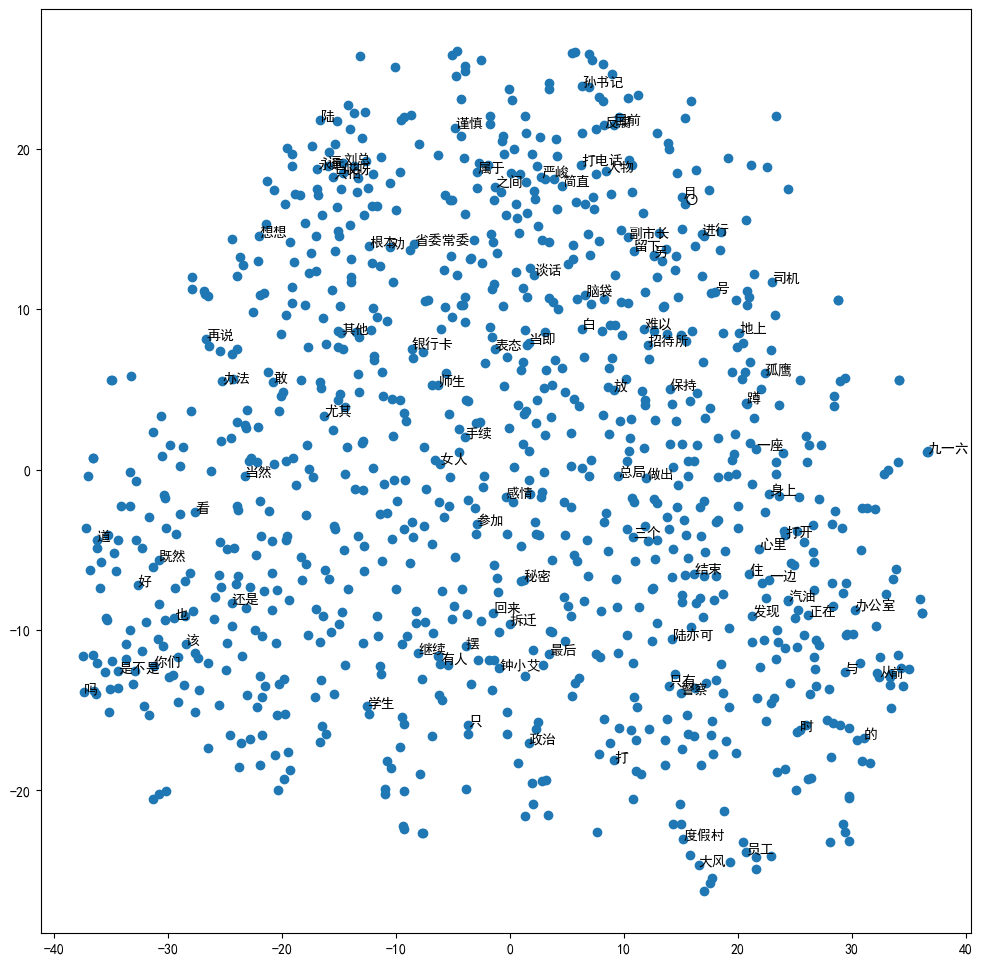

In [61]:
plot_with_matplotlib(x_vals, y_vals, labels)